In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit learn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("high_diamond_ranked_10min.csv")
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
df = df.drop(columns = "gameId", axis = 1)
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


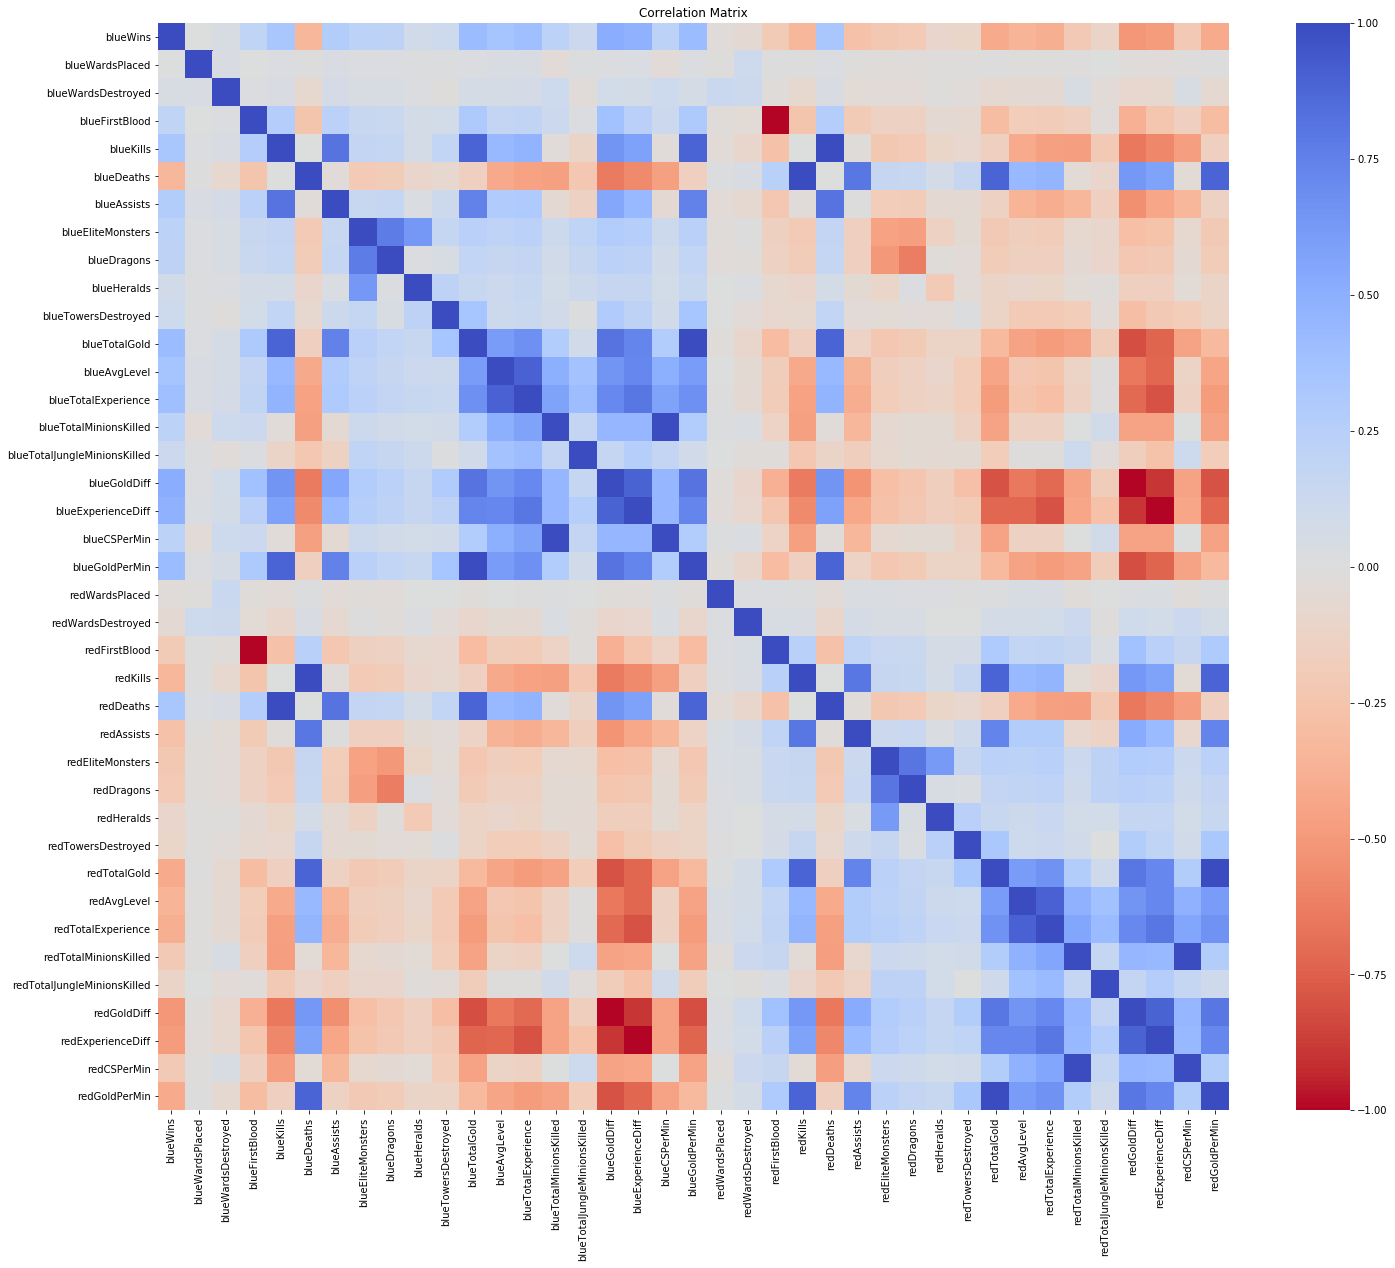

In [4]:
f, ax1 = plt.subplots(figsize = (24,20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Correlation Matrix")
plt.show()

In [5]:
notable_columns = ["blueFirstBlood","blueKills","blueDeaths","blueAssists","blueEliteMonsters", "blueDragons", "blueTotalGold","blueAvgLevel","blueTotalExperience","blueTotalMinionsKilled",
                  "blueGoldDiff","blueExperienceDiff","blueCSPerMin","blueGoldPerMin"]

In [6]:
df[notable_columns]

,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,1,9,6,11,0,0,17210,6.6,17039,195,643,-8,19.5,1721.0
1,0,5,5,5,0,0,14712,6.6,16265,174,-2908,-1173,17.4,1471.2
2,0,7,11,4,1,1,16113,6.4,16221,186,-1172,-1033,18.6,1611.3
3,0,4,5,5,1,0,15157,7.0,17954,201,-1321,-7,20.1,1515.7
4,0,6,6,6,0,0,16400,7.0,18543,210,-1004,230,21.0,1640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,7,4,5,1,1,17765,7.2,18967,211,2519,2469,21.1,1776.5
9875,0,6,4,8,1,1,16238,7.2,19255,233,782,888,23.3,1623.8
9876,0,6,7,5,0,0,15903,7.0,18032,210,-2416,-1877,21.0,1590.3
9877,1,2,3,3,1,1,14459,6.6,17229,224,-839,-1085,22.4,1445.9


In [7]:
X = df[notable_columns]
y = df["blueWins"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [9]:
for key, classifier in classifiers.items():
    pipe = make_pipeline(preprocessing.StandardScaler(), classifier)
    pipe.fit(X_train, y_train)
    training_score = cross_val_score(pipe, X_train, y_train, cv=5)
    print("Classifiers:", classifier.__class__.__name__, "has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 73.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 68.0 % accuracy score
Classifiers:  SVC Has a training score of 72.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 63.0 % accuracy score


In [11]:
from sklearn.metrics import confusion_matrix

LR = make_pipeline(preprocessing.StandardScaler(), LogisticRegression())
SVC = make_pipeline(preprocessing.StandardScaler(), SVC())

LR.fit(X_train, y_train)
SVC.fit(X_train, y_train)

predict_LR = LR.predict(X_test)
predict_SVC = SVC.predict(X_test)

LC_cf = confusion_matrix(y_test, predict_LR)
SVC_cf = confusion_matrix(y_test, predict_SVC)

In [23]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, predict_LR))

print('SVC:')
print(classification_report(y_test, predict_SVC))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1211
           1       0.74      0.75      0.74      1259

    accuracy                           0.74      2470
   macro avg       0.74      0.74      0.74      2470
weighted avg       0.74      0.74      0.74      2470

SVC:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1211
           1       0.74      0.72      0.73      1259

    accuracy                           0.73      2470
   macro avg       0.73      0.73      0.73      2470
weighted avg       0.73      0.73      0.73      2470

